# Imbalanced Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Feel free to import any other packages you need
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline as imblearn_pipeline

In [3]:
#Please change the path approporiately while testing
raw_df = pd.read_csv('path')
raw_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
#
raw_df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
cleaned_df = raw_df.copy()

# You don't want the 'Time' column. Pop it off
cleaned_df.pop('Time')

# The 'Amount' column covers a huge range. Convert it to log-space.
eps = 0.001
cleaned_df['Log Amount'] = np.log(cleaned_df.pop('Amount') + eps)

In [6]:
#
raw_X = cleaned_df.drop(columns='Class')
raw_Y = cleaned_df['Class']

raw_X_train , raw_X_test, raw_Y_train, raw_Y_test = train_test_split(raw_X, raw_Y, test_size= 0.2, random_state=42, stratify = raw_Y)
print(raw_X_train.shape)
print(raw_X_test.shape)

(227845, 29)
(56962, 29)


In [7]:
#
#using pipeline to scale the features for consistency
pipeline = Pipeline([
    ('scaler', StandardScaler())
])
raw_X_train_scaled = pipeline.fit_transform(raw_X_train)
raw_X_test_scaled = pipeline.transform(raw_X_test)


In [8]:
#
clf = DecisionTreeClassifier(max_depth=10,random_state=42)
clf.fit(raw_X_train_scaled, raw_Y_train)
scoring = ['roc_auc', 'average_precision']
scores = cross_validate(clf,raw_X_train_scaled, raw_Y_train, cv= 5, scoring = scoring)
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.8359524571279693, 0.641744070059615)

In [9]:
#
ros = RandomOverSampler(random_state=42)
raw_X_train_oversample , raw_Y_train_oversample = ros.fit_resample(raw_X_train_scaled,raw_Y_train)

print(raw_X_train_scaled.shape)
print(raw_X_train_oversample.shape)
raw_Y_train_oversample.value_counts()



(227845, 29)
(454902, 29)


Class
0    227451
1    227451
Name: count, dtype: int64

In [10]:
#
#Using Imbalanced Learn Pipelines 
ros_pipe = imblearn_pipeline([('ros',ros),('clf',clf)])
ros_pipe.fit(raw_X_train_scaled, raw_Y_train)
scores_ros = cross_validate(ros_pipe,raw_X_train_scaled, raw_Y_train, cv= 5, scoring = scoring)
scores_ros['test_roc_auc'].mean(), scores_ros['test_average_precision'].mean()



(0.8962802947061006, 0.5167581570430926)

### **Random Undersampling**


In [11]:

rus = RandomUnderSampler(replacement=False, random_state=42)
raw_X_train_undersample , raw_Y_train_undersample = rus.fit_resample(raw_X_train_scaled,raw_Y_train)

print(raw_X_train_scaled.shape)
print(raw_X_train_undersample.shape)
raw_Y_train_undersample.value_counts()


(227845, 29)
(788, 29)


Class
0    394
1    394
Name: count, dtype: int64

In [12]:
#
rus_pipe = imblearn_pipeline([('rus',rus),('clf',clf)])
rus_pipe.fit(raw_X_train_scaled, raw_Y_train)
scores_rus = cross_validate(rus_pipe, raw_X_train_scaled, raw_Y_train, cv = 5, scoring = scoring)
scores_rus['test_roc_auc'].mean(), scores_rus['test_average_precision'].mean()

(0.9072986098829894, 0.01655060014804277)

### **SMOTE**


In [13]:
#
smote = SMOTE(random_state=42)
raw_X_train_smote , raw_Y_train_smote = smote.fit_resample(raw_X_train_scaled,raw_Y_train)

print(raw_X_train_scaled.shape)
print(raw_X_train_smote.shape)
raw_Y_train_smote.value_counts()


(227845, 29)
(454902, 29)


Class
0    227451
1    227451
Name: count, dtype: int64

In [14]:
#
smote_pipe = imblearn_pipeline([('smote',smote),('clf',clf)])
smote_pipe.fit(raw_X_train_scaled, raw_Y_train)
scores_smote = cross_validate(smote_pipe, raw_X_train_scaled, raw_Y_train,cv=5,scoring = scoring)
scores_smote['test_roc_auc'].mean(), scores_smote['test_average_precision'].mean()

(0.9023022248050829, 0.4705691055171962)

### **Balanced Weight**


In [15]:
#
clf_balanced = DecisionTreeClassifier(max_depth = 10, random_state = 42,  class_weight = 'balanced')
clf_balanced.fit(raw_X_train_scaled, raw_Y_train)
# raw_Y_pred = clf.predict(raw_X_test_scale
scores_balanced = cross_validate(clf_balanced, raw_X_train_scaled, raw_Y_train, cv = 5, scoring = scoring)
scores_balanced['test_roc_auc'].mean(), scores_balanced['test_average_precision'].mean()


(0.905514887383234, 0.5236357414975382)

### **Model Prediction & Evaluation**


In [16]:
#
models = [clf, ros_pipe, rus_pipe, smote_pipe, clf_balanced]
model_names = ["Default Baseline", "Random Oversampling", "Random Undersampling", "SMOTE", "Balanced Weight"]

for i, model in enumerate( models):
    model.fit(raw_X_train_scaled, raw_Y_train)
    y_pred = model.predict(raw_X_test_scaled)
    auc = roc_auc_score(raw_Y_test, y_pred)
    print( model_names[i], "AUC :", auc)


Default Baseline AUC : 0.8774455054953889
Random Oversampling AUC : 0.8983306392337465
Random Undersampling AUC : 0.914460782906297
SMOTE AUC : 0.9059496055034282
Balanced Weight AUC : 0.8986032194250801


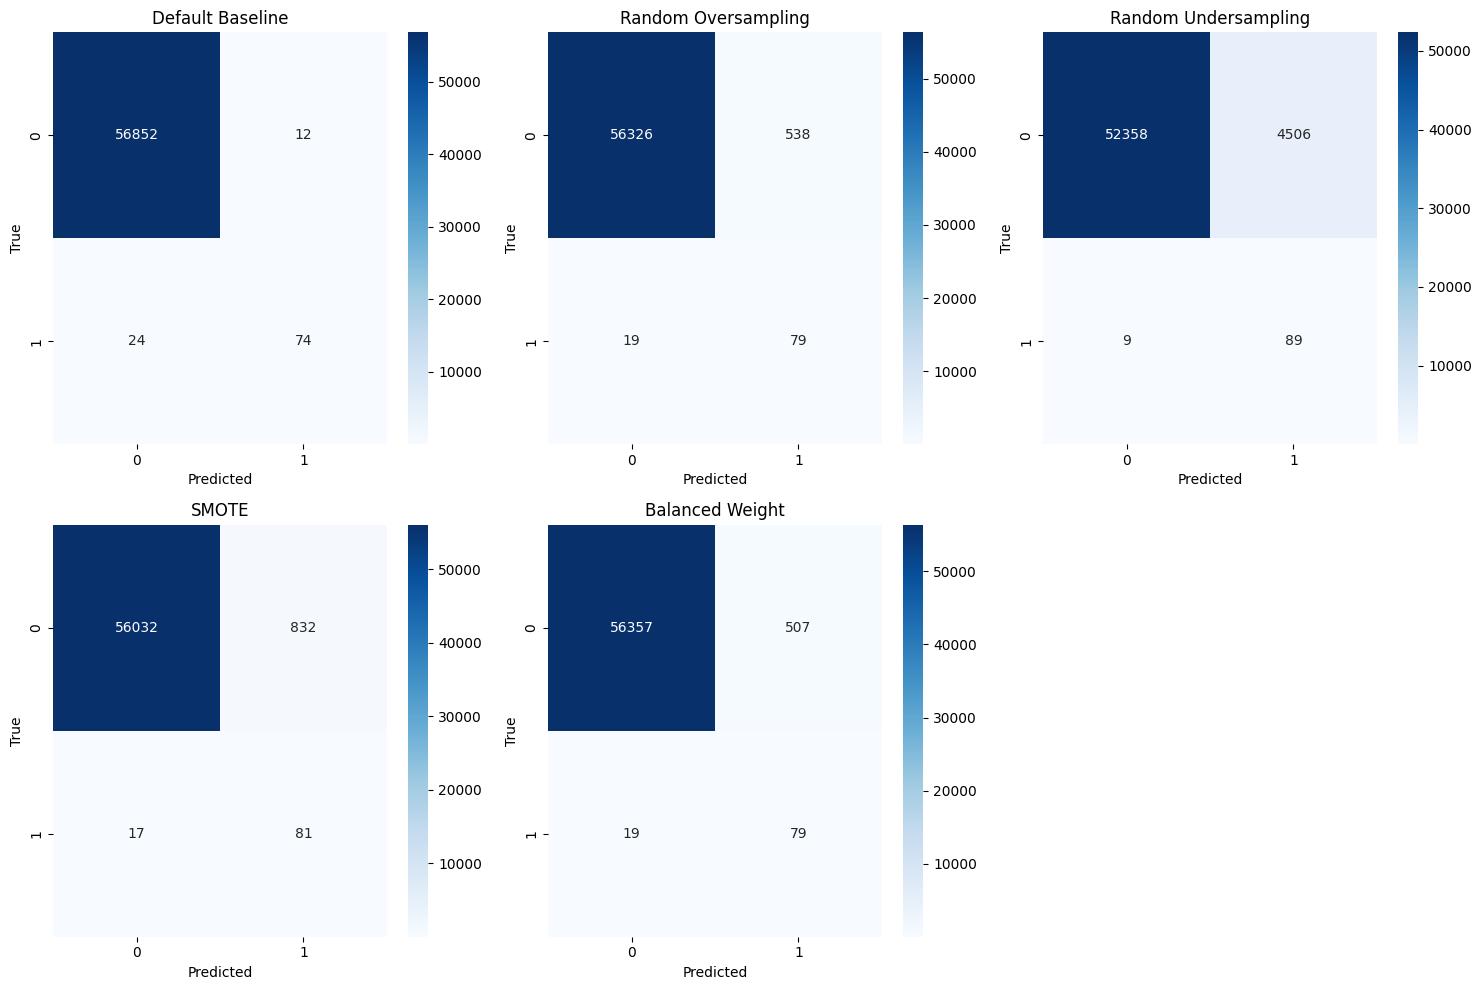

In [23]:
#

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, model in enumerate(models):
    
    model.fit(raw_X_train_scaled, raw_Y_train)
    y_pred = model.predict(raw_X_test_scaled)

    cm = confusion_matrix(raw_Y_test, y_pred)
    
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i // 3, i % 3])
    ax.set_title(model_names[i])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
axes[1,2].axis("off")  
plt.tight_layout()
plt.show()


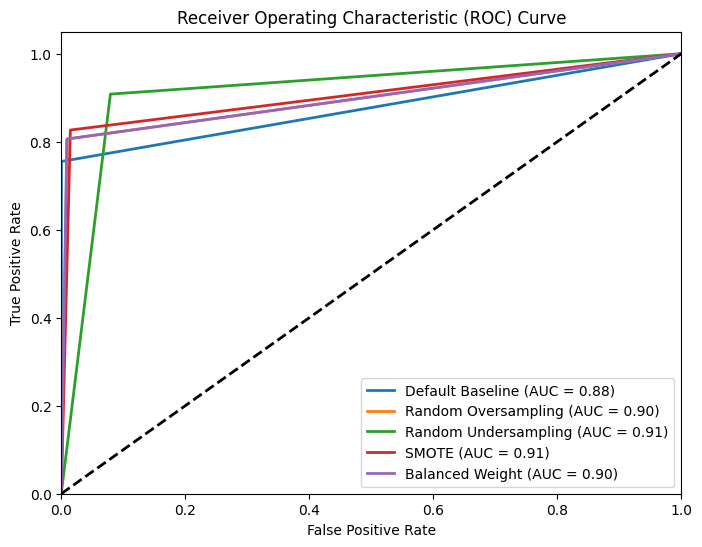

In [25]:
#

plt.figure(figsize=(8, 6))

for i, model in enumerate(models):
 
    model.fit(raw_X_train_scaled, raw_Y_train)
    y_pred = model.predict(raw_X_test_scaled)
    
    fpr, tpr, thresholds = roc_curve(raw_Y_test, y_pred)

    auc = roc_auc_score(raw_Y_test, y_pred)

    plt.plot(fpr, tpr, lw=2, label=f'{model_names[i]} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
